<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/gab-es21%2Fissue35/yolov8/03_yolo_v8_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Detect


## Imports and GPU Check

Check access to GPU.

In [1]:
!pip install nvidia-cuda-runtime-cu12
!pip install cuda-python

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

!pip install roboflow
!pip install ultralytics==8.0.196

!pip install python-dotenv
!pip install pickleshare

!nvidia-smi

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Sat Nov 18 15:52:42 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   52C    P0              50W / 240W |    655MiB /  8192MiB |      2%      Default |
|                                         |                      |                  N/A |

Imports

In [2]:
import os
import dotenv
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local


## Get Environment Variables from drive


Load the .env file

In [3]:
dotenv.load_dotenv('../yolov8_tile_local/yolov8.env')

ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.196  Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 369.2/1862.2 GB disk)


## Model

In [5]:
%cd {HOME}/datasets

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SeaTurtleTile-1 in yolov8:: 100%|██████████| 28724/28724 [00:12<00:00, 2373.25it/s]


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Load Model and Weights

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for 25 epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [ ]:
print(HOME)

/content


In [7]:
#model = YOLO(f'{HOME}/yolov8n.pt')
model = YOLO(f'{HOME}/best.pt')

In [8]:
print(dataset.location)
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets\SeaTurtleTile-1
c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local


## Inference with Custom Model

In [9]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source={dataset.location}/test/images save=True

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local


Ultralytics YOLOv8.0.196  Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1235 c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets\SeaTurtleTile-1\test\images\-_93-_mov-60_jpg.rf.03919d9ed88625a8d6b547acb1a995eb.jpg: 800x800 (no detections), 8.0ms
image 2/1235 c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets\SeaTurtleTile-1\test\images\-_93-_mov-60_jpg.rf.08af296dd955e99bd8f7553bd3b3dfe8.jpg: 800x800 (no detections), 10.5ms
image 3/1235 c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets\SeaTurtleTile-1\test\images\-_93-_mov-60_jpg.rf.0dd1c3685366b7df53777346f28f8b5e.jpg: 800x800 (no detections), 10.6ms
image 4/1235 c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets\SeaTurtleTile-1\test\images\-_93-_mov-60_jpg.rf.22d3b7704fc29c390d4d776f62a6968f.jpg: 800x800 (no detections), 7.5ms
im

**NOTE:** Let's take a look at few results.

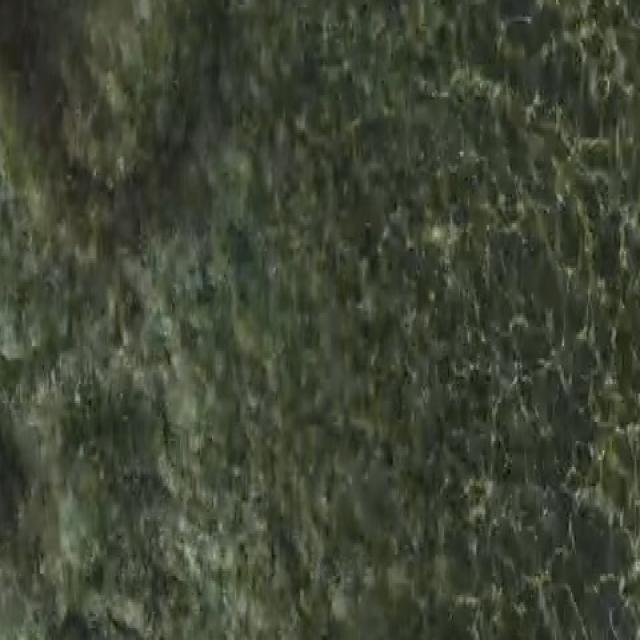

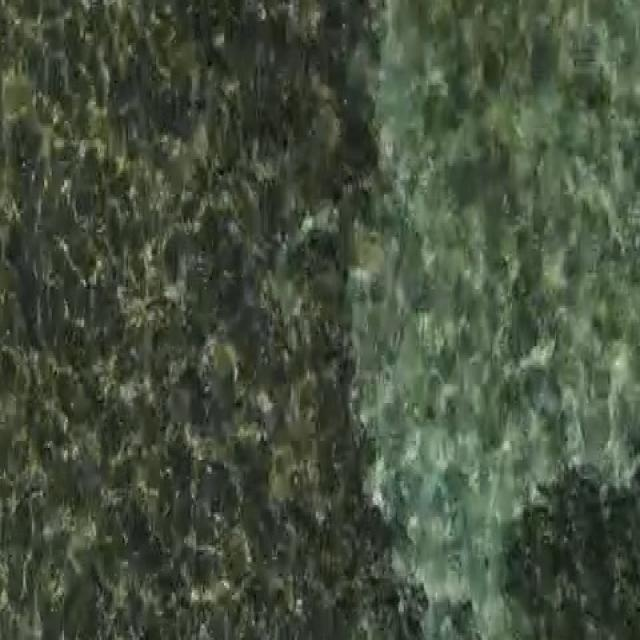

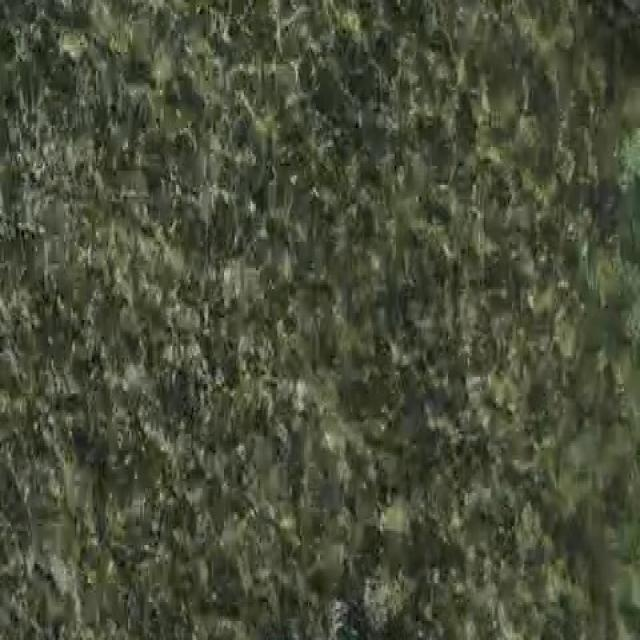

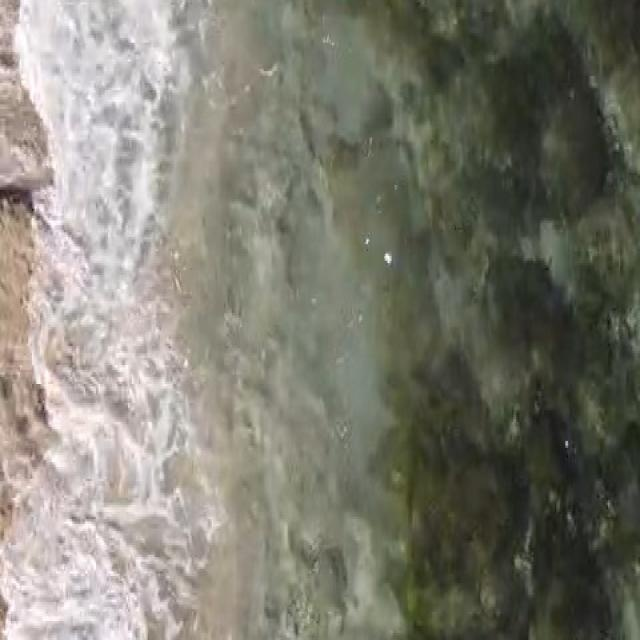

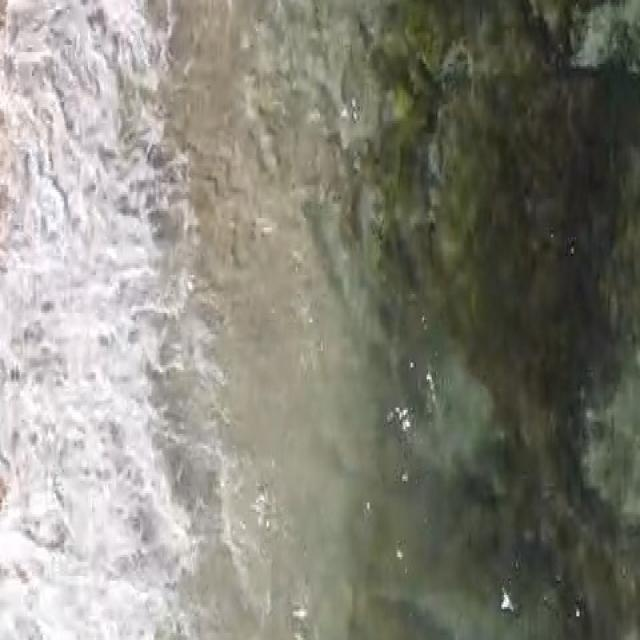

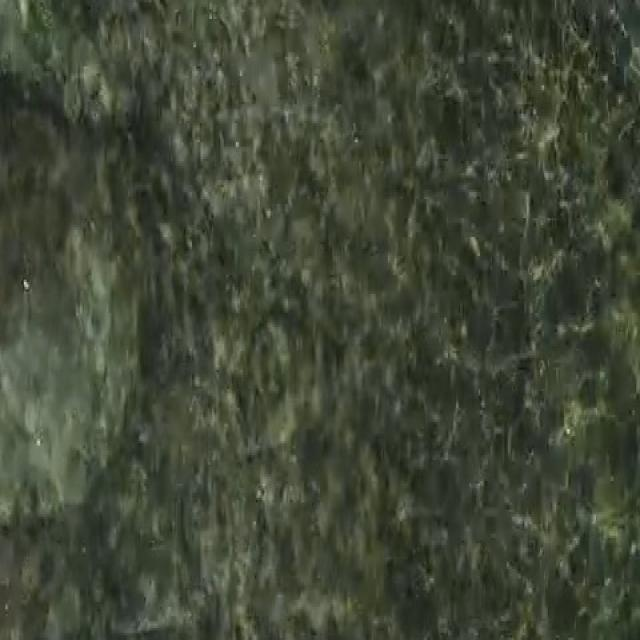

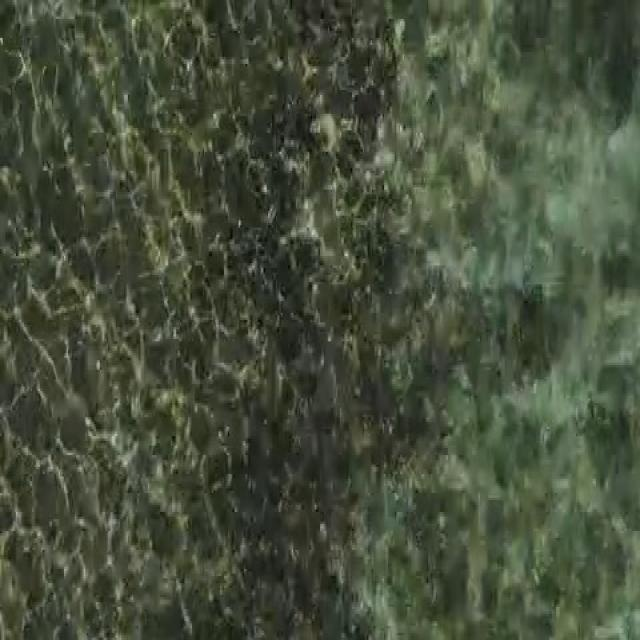

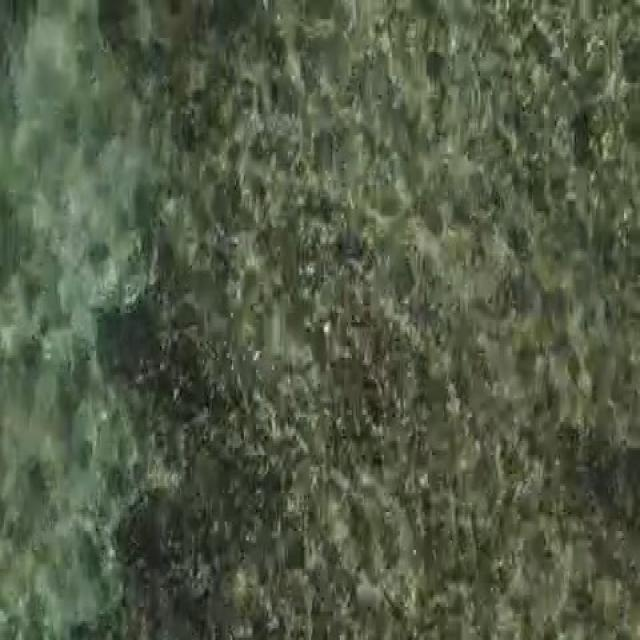

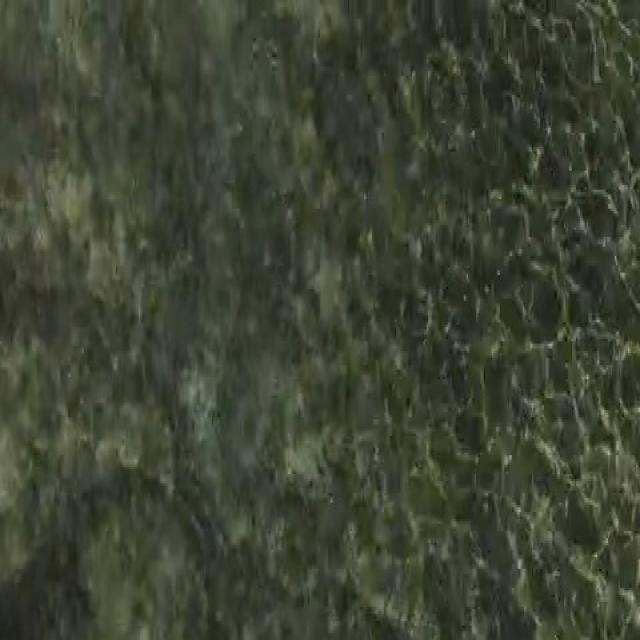

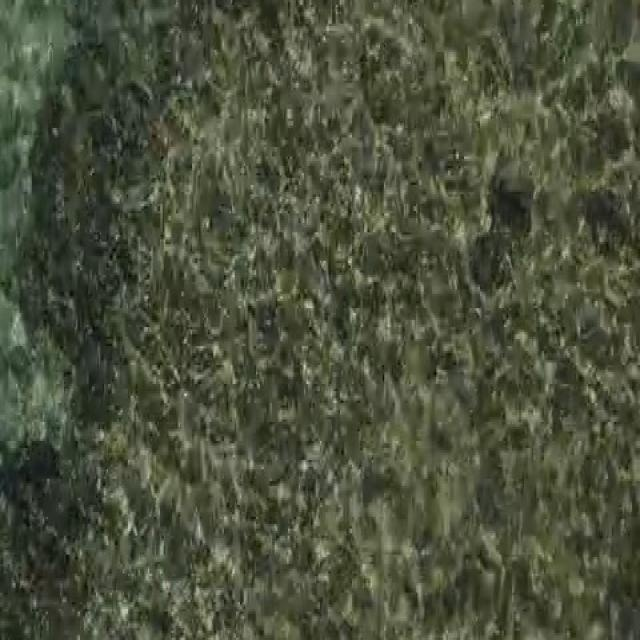

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
COUNT=1

In [ ]:
%cd {HOME}/videos_out
# Save Output with Bounding Boxes to a Text File
!yolo task=detect mode=predict model={HOME}{DRIVE_YOLOV8}/detect/train/weights/best.pt conf=0.1 source={HOME}{DRIVE_YOLOV8}/videos/video1.mp4 > {HOME}{DRIVE_YOLOV8}/videos/output.txt save=True


/content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos_out
2023-10-22 22:50:42.652658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 22:50:43.732588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
video 1/1 (1/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 480x800 2 Turtles, 53.1ms
video 1/1 (2/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 480x800 4 Turtles, 7.3ms
video 1/1 (3/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 48